<a href="https://colab.research.google.com/github/Faabry/Data_Analysis/blob/main/Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>Telecomunicações</b></h1>
<p>Uma empresa de telecomunicações possui registros históricos em um volume dedados de  mais  de  150  mil  registros.  Os  dados  serão  usados  para  modelagem  preditiva,  mas  antes precisamos realizar um trabalho de limpeza pois os dados possuem diversos problemas.</p>
<p>Daremos ênfase ao tratamento devalores ausentes, tratamento de outliers e ajuste dos tipos de dados. Ao final vamos gerar um novo arquivo csv com os dados limpos.</p>

# **Instalando os Pacotes Necessários**

In [83]:
from platform import python_version as pyvers
print(f"Sua Versão Python Para Este Projeto: {pyvers()}")

Sua Versão Python Para Este Projeto: 3.9.16


In [84]:
!pip install -q -U watermark

In [85]:
# Imports
import math
import sys, os
import numpy as np
import pandas as pd

In [86]:
# Adicionando o caminho para os modulos do projeto
sys.path.append(os.path.abspath(os.path.join("modulos")))
from estrategia1 import *
from estrategia2 import *
from estrategia3 import *

In [87]:
pd.set_option("display.max_columns", 100)

In [88]:
%reload_ext watermark
%watermark -a "Airton Fabre" --iversions

Author: Airton Fabre

sys   : 3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]
pandas: 1.4.4
numpy : 1.22.4



<h1><b>Carregando os Dados</h1></b>

In [89]:
# Criando uma lista de valores para substituir por NaN caso estejam no dataframe
nan_list = ["n/a", "na", "undefined"]

In [90]:
# Carregando o dataframe com o parâmetro de valores ausentes definido acima
df = pd.read_csv("dataset.csv", na_values = nan_list)
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770,4/25/2019 14:35,662,1823652,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23,44,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624,38787,1823652892,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765,24420,1634479,1271433,3563542,137762,15854611,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235,4/25/2019 8:15,606,1365104,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16,26,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168,3560,1365104371,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113,7165,3493924,920172,629046,308339,20247395,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1,4/25/2019 11:58,652,1361762,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6,9,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0,0,1361762651,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053,42224,8535055,1694064,2690151,672973,19725661,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486,4/25/2019 7:36,171,1321509,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44,44,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330,37882,1321509685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121,13372,9023734,2788027,1439754,631229,21388122,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565,4/25/2019 10:40,954,1089009,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6,9,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0,0,1089009389,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600,50188,6248284,1500559,1936496,173853,15259380,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [91]:
df.shape

(119661, 55)

In [92]:
# Carregando o Dicionário
dicionario = pd.read_excel("Dicionario.xlsx")
dicionario.head()

,Fields,Description
0,bearer id,xDr session identifier
1,Dur. (ms),Total Duration of the xDR (in ms)
2,Start,Start time of the xDR (first frame timestamp)
3,Start ms,Milliseconds offset of start time for the xDR ...
4,End,End time of the xDR (last frame timestamp)


In [93]:
dicionario.shape

(56, 2)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119661 entries, 0 to 119660
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 118745 non-null  float64
 1   Start                                     119661 non-null  object 
 2   Start ms                                  119661 non-null  int64  
 3   End                                       119661 non-null  object 
 4   End ms                                    119661 non-null  int64  
 5   Dur. (ms)                                 119661 non-null  int64  
 6   IMSI                                      119152 non-null  float64
 7   MSISDN/Number                             118710 non-null  float64
 8   IMEI                                      119150 non-null  float64
 9   Last Location Name                        118601 non-null  object 
 10  Avg RTT DL (ms)     

In [95]:
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.187450e+05,119661.000000,119661.000000,1.196610e+05,1.191520e+05,1.187100e+05,1.191500e+05,98584.000000,98597.000000,119661.000000,119661.000000,5.023300e+04,4.301900e+04,119008.000000,119008.000000,119008.000000,119008.000000,119032.000000,119032.000000,119032.000000,119032.000000,5.578000e+04,5.555800e+04,1.196610e+05,1.196610e+05,1.196610e+05,42157.000000,46039.000000,45554.000000,15120.000000,50101.000000,29876.000000,119007.000000,119031.000000,1.196610e+05,119661.000000,1.196610e+05,1.196610e+05,1.196610e+05,119661.000000,1.196610e+05,1.196600e+05,1.196600e+05,1.196600e+05,1.196600e+05,1.196600e+05,1.196600e+05,1.196600e+05,1.196600e+05,1.196600e+05
mean,1.011788e+19,499.638061,499.033386,9.864248e+04,2.082017e+14,3.370111e+10,4.773074e+13,115.515723,16.507409,13198.298426,1710.372352,1.919757e+07,7.090080e+05,92.826415,3.133025,1.706356,1.564029,98.536612,0.776959,0.142609,0.074593,1.094104e+08,3.068919e+06,1.697780e+06,1.311816e+06,9.864302e+07,904.420286,310.507005,743.321311,142.254431,884.784934,131.951500,3473.973237,3750.775117,1.797813e+06,32899.978807,5.746982e+06,2.057389e+06,1.789921e+06,467485.712170,1.161622e+07,1.100412e+07,1.163702e+07,1.099919e+07,4.223851e+08,8.293330e+06,4.206770e+08,8.268358e+06,4.112278e+07,4.549732e+08
std,2.892881e+18,288.829955,288.430377,8.003869e+04,2.082705e+10,9.181389e+09,2.198979e+13,672.139192,77.925621,23742.922329,4511.784595,1.745130e+08,2.712792e+07,12.992857,6.313422,4.127855,4.721350,4.584672,3.234202,1.605961,1.249404,9.803767e+08,1.999004e+07,5.495859e+06,4.480912e+06,8.003869e+07,2447.720316,1355.354622,1802.190448,1239.768070,1870.741404,982.172541,8837.939657,9763.524803,1.034949e+06,19010.766577,3.308900e+06,1.190680e+06,1.035201e+06,270099.203178,6.709798e+06,6.340709e+06,6.722847e+06,6.358565e+06,2.440078e+08,4.784540e+06,2.431591e+08,4.766989e+06,1.128585e+07,2.442054e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040808e+14,3.360100e+10,4.402138e+11,0.000000,0.000000,0.000000,0.000000,2.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+01,4.000000e+01,0.000000e+00,0.000000e+00,7.142988e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,9.700000e+01,2.000000,5.800000e+01,1.050000e+02,4.200000e+01,2.260000e+02,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,4.579500e+04,2.082010e+14,3.365099e+10,3.544421e+13,32.000000,2.000000,43.000000,47.000000,2.828900e+04,4.133500e+03,91.000000,0.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,9.209175e+04,2.027750e+04,1.389900e+04,2.014600e+04,4.579600e+07,17.000000,9.000000,22.000000,2.000000,32.000000,2.000000,85.000000,102.000000,9.044690e+05,16413.000000,2.875883e+06,1.025114e+06,8.916570e+05,233249.000000,5.808125e+06,5.514711e+06,5.780678e+06

<p>Não faz sentido analisar <b>Bearer Id, IMS, MSISDN/Number e IMEI</b>. Mas o método <i>describe()</i> mostra a analise estatística de todas as colunas <b>numéricas</b>. Essas estatísticas estão sendo calculadas antes que os dados sejam limpos. Portanto podem haver alterações após a limpeza.</p>

In [96]:
df.shape

(119661, 55)

In [97]:
dicionario.shape

(56, 2)

In [98]:
dicionario.columns

Index(['Fields', 'Description'], dtype='object')

<p> Temos 55 colunas no DataFrame, mas temos 56 colunas no Dicionario, portanto será necessário analisar qual coluna está faltando no DataFrame e verificar se ela é ou não relevante.</p>

In [99]:
# Concatenando e comparando as colunas do DataFrame e do Dicionario 
# para localizar a coluna ausente.
columns_match = pd.concat([pd.Series(df.columns.tolist()),
                           dicionario["Fields"]],
                           axis = 1)          

In [100]:
# Renomeando as colunas
columns_match.rename(columns = {0: "Coluna DataFrame", "Fields": "Coluna Dicionario"},
                     inplace = True)

In [101]:
# Exibindo o DataFrame
columns_match

,Coluna DataFrame,Coluna Dicionario
0,Bearer Id,bearer id
1,Start,Dur. (ms)
2,Start ms,Start
3,End,Start ms
4,End ms,End
5,Dur. (ms),End ms
6,IMSI,Dur. (s)
7,MSISDN/Number,IMSI
8,IMEI,MSISDN/Number
9,Last Location Name,IMEI


In [102]:
df[["Dur. (ms)", "Dur. (ms).1"]]

,Dur. (ms),Dur. (ms).1
0,1823652,1823652892
1,1365104,1365104371
2,1361762,1361762651
3,1321509,1321509685
4,1089009,1089009389
...,...,...
119656,86422,86422207
119657,75381,75381326
119658,75381,75381321
119659,86400,86400055


<p>Parece que a coluna "Dur.(Ms)" é medida em segundos. Portanto, vamos renomeá-la apropriadamente. Vamos também renomear algumas das colunas para
que fiquem claras como sua descrição e sigam o estilo de nomenclatura de outras colunas.</p>

In [103]:
df.rename(columns = {"Dur. (ms)": "Dur (s)",
                    "Dur. (ms).1": "Dur (ms)",
                    "Start ms": "Start Offset (ms)",
                    "End ms": "End Offset (ms)"},
          inplace = True)                  

In [104]:
df.columns.tolist()

['Bearer Id',
 'Start',
 'Start Offset (ms)',
 'End',
 'End Offset (ms)',
 'Dur (s)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur (ms)',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 12

<h3><b>Método Padrão para Verificar Valores Ausentes</b></h3>

In [105]:
# Porcentagem de valores ausentes por coluna
missing_values = df.isna().sum() / len(df) * 100
missing_values.round(2)

Bearer Id                                    0.77
Start                                        0.00
Start Offset (ms)                            0.00
End                                          0.00
End Offset (ms)                              0.00
Dur (s)                                      0.00
IMSI                                         0.43
MSISDN/Number                                0.79
IMEI                                         0.43
Last Location Name                           0.89
Avg RTT DL (ms)                             17.61
Avg RTT UL (ms)                             17.60
Avg Bearer TP DL (kbps)                      0.00
Avg Bearer TP UL (kbps)                      0.00
TCP DL Retrans. Vol (Bytes)                 58.02
TCP UL Retrans. Vol (Bytes)                 64.05
DL TP < 50 Kbps (%)                          0.55
50 Kbps < DL TP < 250 Kbps (%)               0.55
250 Kbps < DL TP < 1 Mbps (%)                0.55
DL TP > 1 Mbps (%)                           0.55


<h1><b>Estratégia de Limpeza 1: Removendo Valores Ausentes</b></h1>
<ul>
  <li>Identificando Valores Ausentes
  <li>Drop de Colunas
  <li>Imputação com Preenchimento Reverso
  <li>Imputação com Preenchimento Progressivo
  <li>Imputação de Variáveis Categóricas
  <li>Drop de Linhas
</ul>

<h3> Usando métodos do módulo "estrategia1" </h3>

In [106]:
help(func_calc_percentual_valores_ausentes)

Help on function func_calc_percentual_valores_ausentes in module estrategia1:

func_calc_percentual_valores_ausentes(df)
    # Calcula o percentual de valores ausentes



In [107]:
# Verificando a porcentagem total de valores ausentes do dataframe
func_calc_percentual_valores_ausentes(df)

O dataset tem 12.62 % de valores ausentes.


In [108]:
# Exibindo os valores ausentes por coluna usando um método do módulo
missing_values = func_calc_percentual_valores_ausentes_coluna(df)

O dataset tem 55 colunas.
Encontrado: 38 colunas que têm valores ausentes.


In [109]:
missing_values

,Valores Ausentes,% de Valores Ausentes,Dtype
Nb of sec with 37500B < Vol UL,104541,87.36,float64
Nb of sec with 6250B < Vol UL < 37500B,89785,75.03,float64
Nb of sec with 125000B < Vol DL,77504,64.77,float64
TCP UL Retrans. Vol (Bytes),76642,64.05,float64
Nb of sec with 31250B < Vol DL < 125000B,74107,61.93,float64
Nb of sec with 1250B < Vol UL < 6250B,73622,61.53,float64
Nb of sec with 6250B < Vol DL < 31250B,69560,58.13,float64
TCP DL Retrans. Vol (Bytes),69428,58.02,float64
HTTP UL (Bytes),64103,53.57,float64
HTTP DL (Bytes),63881,53.38,float64


<p>Por conveção iremos remover colunas que tiverem mais de 30% de valores ausentes.</p>

In [110]:
colunas_para_remover = missing_values[missing_values["% de Valores Ausentes"] >= 30.00].index.tolist()
colunas_para_remover

['Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with 125000B < Vol DL',
 'TCP UL Retrans. Vol (Bytes)',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'TCP DL Retrans. Vol (Bytes)',
 'HTTP UL (Bytes)',
 'HTTP DL (Bytes)']

<p>Por mais que as variáveis TCP tenham uma grande porcentagem de valores ausentes, não iremos remove-las, ao invés disso iremos imputá-las pois ao decorrer da nossa análise elas poderão ser necesárias.</p>

In [111]:
# Definindo as colunas que serão removidas
colunas_para_remover = [coluna for coluna in colunas_para_remover if coluna not in ["TCP UL Retrans. Vol (Bytes)", "TCP DL Retrans. Vol (Bytes)"]]
colunas_para_remover

['Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'HTTP UL (Bytes)',
 'HTTP DL (Bytes)']

In [112]:
# Removendo as colunas e gerando um novo dataframe
new_df = df.drop(colunas_para_remover, axis = 1)

In [113]:
new_df.shape

(119661, 47)

In [114]:
func_calc_percentual_valores_ausentes(new_df)

O dataset tem 3.8 % de valores ausentes.


<p>Uma vez que as porcentagens ausentes de <b>TCP UL Retrans.Vol (Bytes)</b> e <b>TCP DF Retrans. Vol(Bytes)</b>
são muito altos, iremos imputá-los com o método de preenchimento reverso.</p>
<p>Nesse caso, usar um único valor como média ou mediana não é aconselhável, pois pode alterar de forma significativa
a nossa variável, tornando a maioria dos valores igual a um único valor.</p>

In [115]:
fix_missing_bfill(new_df, "TCP DL Retrans. Vol (Bytes)")

69428 valores ausentes na coluna TCP DL Retrans. Vol (Bytes) foram substituídos usando o método de preenchimento reverso.


0            19520.0
1            19520.0
2            19520.0
3            19520.0
4            19520.0
             ...    
119656    19176572.0
119657     2223859.0
119658      122336.0
119659      122336.0
119660      438893.0
Name: TCP DL Retrans. Vol (Bytes), Length: 119661, dtype: float64

In [116]:
fix_missing_bfill(new_df, "TCP UL Retrans. Vol (Bytes)")

76642 valores ausentes na coluna TCP UL Retrans. Vol (Bytes) foram substituídos usando o método de preenchimento reverso.


0           7230.0
1           7230.0
2           7230.0
3           7230.0
4           7230.0
            ...   
119656      1330.0
119657    159897.0
119658      1330.0
119659      1330.0
119660    103146.0
Name: TCP UL Retrans. Vol (Bytes), Length: 119661, dtype: float64

In [117]:
missing = func_calc_percentual_valores_ausentes_coluna(new_df)

O dataset tem 47 colunas.
Encontrado: 28 colunas que têm valores ausentes.


<p> As próximas variáveis são Avg RTT DL (ms) e Avg RTT UL (ms) com a maior porcentagem de valores ausentes com 18.5% cada. Vamos verificar se essas variáveis estão enviesadas(não seguem uma distribuição normal). </p>
<p> Caso elas sigam uma distribuição normal, é possivel imputar o valor da média ou mediana aos valores ausentes, caso contrário será necessário outra abordagem.</p>


In [118]:
new_df["Avg RTT DL (ms)"].skew(skipna = True)

60.3245980744293

In [119]:
new_df["Avg RTT UL (ms)"].skew(skipna = True)

32.080511092812955


- Se a assimetria estiver entre -0,5 e 0,5 os dados são bastante simétricos
- Se a assimetria estiver entre -1 e -0,5 os dados estão moderadamente inclinados
- Se a assimetria estiver entre -1 ou maior que 1 os dados estão altamente enviesados

<p> Como podemos observar ambas as variáveis estão totalmente eviesadas. Portanto iremos utilizar o método de fillna com o forward fill que é basicamente o preenchimento progressivo.</p>

In [120]:
fix_missing_ffill(new_df, "Avg RTT DL (ms)")

21077 valores ausentes na coluna Avg RTT DL (ms) foram substituídos usando o método de preenchimento progressivo.


0          42.0
1          65.0
2          65.0
3          65.0
4          65.0
          ...  
119656    205.0
119657     63.0
119658     16.0
119659     62.0
119660     72.0
Name: Avg RTT DL (ms), Length: 119661, dtype: float64

In [121]:
fix_missing_ffill(new_df, "Avg RTT UL (ms)")

21064 valores ausentes na coluna Avg RTT UL (ms) foram substituídos usando o método de preenchimento progressivo.


0          5.0
1          5.0
2          5.0
3          5.0
4          5.0
          ... 
119656     5.0
119657    20.0
119658     0.0
119659    24.0
119660     9.0
Name: Avg RTT UL (ms), Length: 119661, dtype: float64

In [122]:
func_calc_percentual_valores_ausentes(new_df)

O dataset tem 0.45 % de valores ausentes.


In [123]:
func_calc_percentual_valores_ausentes_linha(new_df)

8.01 % das linhas no conjunto de dados contêm pelo menos um valor ausente.


In [124]:
func_calc_percentual_valores_ausentes_coluna(new_df)

O dataset tem 47 colunas.
Encontrado: 26 colunas que têm valores ausentes.


,Valores Ausentes,% de Valores Ausentes,Dtype
Handset Manufacturer,7544,6.30,object
Handset Type,7544,6.30,object
Last Location Name,1060,0.89,object
MSISDN/Number,951,0.79,float64
Bearer Id,916,0.77,float64
Nb of sec with Vol DL < 6250B,654,0.55,float64
DL TP > 1 Mbps (%),653,0.55,float64
50 Kbps < DL TP < 250 Kbps (%),653,0.55,float64
DL TP < 50 Kbps (%),653,0.55,float64
250 Kbps < DL TP < 1 Mbps (%),653,0.55,float64


In [125]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119661 entries, 0 to 119660
Data columns (total 47 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       118745 non-null  float64
 1   Start                           119661 non-null  object 
 2   Start Offset (ms)               119661 non-null  int64  
 3   End                             119661 non-null  object 
 4   End Offset (ms)                 119661 non-null  int64  
 5   Dur (s)                         119661 non-null  int64  
 6   IMSI                            119152 non-null  float64
 7   MSISDN/Number                   118710 non-null  float64
 8   IMEI                            119150 non-null  float64
 9   Last Location Name              118601 non-null  object 
 10  Avg RTT DL (ms)                 119661 non-null  float64
 11  Avg RTT UL (ms)                 119661 non-null  float64
 12  Avg Bearer TP DL

<p> As próximas colunas com maior porcentagem de valores ausentes são <b>Handset Manufacturer</b> e <b>Handset Type</b> com  6,37%, porém por se tratarem de variáveis do <i>tipo categórica</i>, não será possivel realizar o método de preenchimento reverso ou progressivo, será necessário utilizar uma outra abordagem.</p>

In [126]:
fix_missing_value(new_df, "Handset Manufacturer", "unknown")
fix_missing_value(new_df, "Handset Type", "unknown")

7544 valores ausentes na coluna Handset Manufacturer foram substituídos por unknown.
7544 valores ausentes na coluna Handset Type foram substituídos por unknown.


0           Samsung Galaxy A5 Sm-A520F
1          Samsung Galaxy J5 (Sm-J530)
2             Samsung Galaxy A8 (2018)
3                              unknown
4                     Samsung Sm-G390F
                      ...             
119656    Wiko Global Sasu Wiko Lenny2
119657         Apple iPhone Xr (A2105)
119658         Apple iPhone Xr (A2105)
119659                Huawei B528S-23A
119660        Samsung Galaxy A8 (2018)
Name: Handset Type, Length: 119661, dtype: object

In [127]:
func_calc_percentual_valores_ausentes(new_df)

O dataset tem 0.18 % de valores ausentes.


In [128]:
func_calc_percentual_valores_ausentes_linha(new_df)

2.26 % das linhas no conjunto de dados contêm pelo menos um valor ausente.


<p> Uma vez que apenas 2,26% dos valores dentre as 120000 linhas estão ausentes, remover essas linhas não terá um grande impacto na nossa análise.</p>

In [129]:
drop_rows_with_missing_values(new_df)

2705 linhas contendo valores ausentes foram descartadas.


In [130]:
func_calc_percentual_valores_ausentes(new_df)

O dataset tem 0.0 % de valores ausentes.


In [131]:
new_df.shape

(116956, 47)

<h1><b>Estratégia 2: Convertendo os tipos dos dados</b></h1>

In [132]:
new_df.dtypes

Bearer Id                         float64
Start                              object
Start Offset (ms)                   int64
End                                object
End Offset (ms)                     int64
Dur (s)                             int64
IMSI                              float64
MSISDN/Number                     float64
IMEI                              float64
Last Location Name                 object
Avg RTT DL (ms)                   float64
Avg RTT UL (ms)                   float64
Avg Bearer TP DL (kbps)             int64
Avg Bearer TP UL (kbps)             int64
TCP DL Retrans. Vol (Bytes)       float64
TCP UL Retrans. Vol (Bytes)       float64
DL TP < 50 Kbps (%)               float64
50 Kbps < DL TP < 250 Kbps (%)    float64
250 Kbps < DL TP < 1 Mbps (%)     float64
DL TP > 1 Mbps (%)                float64
UL TP < 10 Kbps (%)               float64
10 Kbps < UL TP < 50 Kbps (%)     float64
50 Kbps < UL TP < 300 Kbps (%)    float64
UL TP > 300 Kbps (%)              

In [133]:
new_df.head()

,Bearer Id,Start,Start Offset (ms),End,End Offset (ms),Dur (s),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur (ms),Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770,4/25/2019 14:35,662,1823652,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23,44,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,37624,38787,1823652892,Samsung,Samsung Galaxy A5 Sm-A520F,213.0,214.0,1545765,24420,1634479,1271433,3563542,137762,15854611,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235,4/25/2019 8:15,606,1365104,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16,26,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,168,3560,1365104371,Samsung,Samsung Galaxy J5 (Sm-J530),971.0,1022.0,1926113,7165,3493924,920172,629046,308339,20247395,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1,4/25/2019 11:58,652,1361762,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,65.0,5.0,6,9,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0,0,1361762651,Samsung,Samsung Galaxy A8 (2018),751.0,695.0,1684053,42224,8535055,1694064,2690151,672973,19725661,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486,4/25/2019 7:36,171,1321509,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,65.0,5.0,44,44,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,3330,37882,1321509685,unknown,unknown,17.0,207.0,644121,13372,9023734,2788027,1439754,631229,21388122,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565,4/25/2019 10:40,954,1089009,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,65.0,5.0,6,9,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0,0,1089009389,Samsung,Samsung Sm-G390F,607.0,604.0,862600,50188,6248284,1500559,1936496,173853,15259380,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


<p> Tanto a coluna Start quanto a coluna End estão classificadas como tipo object, sabemos que são colunas do tipo data, vamos então converter para os tipos corretos.</p>

In [134]:
new_df["Start"] = pd.to_datetime(df["Start"])
new_df["End"] = pd.to_datetime(df["End"])

In [135]:
new_df.dtypes

Bearer Id                                float64
Start                             datetime64[ns]
Start Offset (ms)                          int64
End                               datetime64[ns]
End Offset (ms)                            int64
Dur (s)                                    int64
IMSI                                     float64
MSISDN/Number                            float64
IMEI                                     float64
Last Location Name                        object
Avg RTT DL (ms)                          float64
Avg RTT UL (ms)                          float64
Avg Bearer TP DL (kbps)                    int64
Avg Bearer TP UL (kbps)                    int64
TCP DL Retrans. Vol (Bytes)              float64
TCP UL Retrans. Vol (Bytes)              float64
DL TP < 50 Kbps (%)                      float64
50 Kbps < DL TP < 250 Kbps (%)           float64
250 Kbps < DL TP < 1 Mbps (%)            float64
DL TP > 1 Mbps (%)                       float64
UL TP < 10 Kbps (%) 

In [136]:
new_df.head(3)

,Bearer Id,Start,Start Offset (ms),End,End Offset (ms),Dur (s),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur (ms),Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770,2019-04-25 14:35:00,662,1823652,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23,44,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,37624,38787,1823652892,Samsung,Samsung Galaxy A5 Sm-A520F,213.0,214.0,1545765,24420,1634479,1271433,3563542,137762,15854611,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,235,2019-04-25 08:15:00,606,1365104,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16,26,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,168,3560,1365104371,Samsung,Samsung Galaxy J5 (Sm-J530),971.0,1022.0,1926113,7165,3493924,920172,629046,308339,20247395,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,1,2019-04-25 11:58:00,652,1361762,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,65.0,5.0,6,9,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0,0,1361762651,Samsung,Samsung Galaxy A8 (2018),751.0,695.0,1684053,42224,8535055,1694064,2690151,672973,19725661,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0


In [137]:
# Verificando as colunas do tipo "object"
string_columns = new_df.select_dtypes(include = "object").columns.tolist()
string_columns

['Last Location Name', 'Handset Manufacturer', 'Handset Type']

In [138]:
# Convertendo as colunas do tipo "object" para o tipo "string"
new_df[["Last Location Name", "Handset Manufacturer", "Handset Type"]] = new_df[["Last Location Name", "Handset Manufacturer", "Handset Type"]].astype("string")

In [139]:
new_df.dtypes

Bearer Id                                float64
Start                             datetime64[ns]
Start Offset (ms)                          int64
End                               datetime64[ns]
End Offset (ms)                            int64
Dur (s)                                    int64
IMSI                                     float64
MSISDN/Number                            float64
IMEI                                     float64
Last Location Name                        string
Avg RTT DL (ms)                          float64
Avg RTT UL (ms)                          float64
Avg Bearer TP DL (kbps)                    int64
Avg Bearer TP UL (kbps)                    int64
TCP DL Retrans. Vol (Bytes)              float64
TCP UL Retrans. Vol (Bytes)              float64
DL TP < 50 Kbps (%)                      float64
50 Kbps < DL TP < 250 Kbps (%)           float64
250 Kbps < DL TP < 1 Mbps (%)            float64
DL TP > 1 Mbps (%)                       float64
UL TP < 10 Kbps (%) 

<p> Também sabemos que as colunas Bearer Id, IMSI, MSISDN/Number e IMEI são colunas do tipo numérica, portanto vamos modificá-las de float64 para int64.</p>

In [140]:
# Convertendo as colunas do tipo float64 para int64
new_df[["Bearer Id", "IMSI", "MSISDN/Number", "IMEI"]] = new_df[["Bearer Id", "IMSI", "MSISDN/Number", "IMEI"]].astype("int64")

In [141]:
new_df.dtypes

Bearer Id                                  int64
Start                             datetime64[ns]
Start Offset (ms)                          int64
End                               datetime64[ns]
End Offset (ms)                            int64
Dur (s)                                    int64
IMSI                                       int64
MSISDN/Number                              int64
IMEI                                       int64
Last Location Name                        string
Avg RTT DL (ms)                          float64
Avg RTT UL (ms)                          float64
Avg Bearer TP DL (kbps)                    int64
Avg Bearer TP UL (kbps)                    int64
TCP DL Retrans. Vol (Bytes)              float64
TCP UL Retrans. Vol (Bytes)              float64
DL TP < 50 Kbps (%)                      float64
50 Kbps < DL TP < 250 Kbps (%)           float64
250 Kbps < DL TP < 1 Mbps (%)            float64
DL TP > 1 Mbps (%)                       float64
UL TP < 10 Kbps (%) 

<p> Ao que tudo indica nosso trabalho de conversão de dados está concluido, no entanto foi observado que temos a coluna Dur(s) e Dur(ms) oque pode indicar valores duplicados, uma vez que Dur(s) é a duração em segundos e Dur(ms) a duração em milisegundos, vamos checar se existe duplicidade nos nossos dados.</p>

In [142]:
# Verificando se existe duplicidade de valores
drop_duplicates(new_df)

Nenhuma linha duplicada foi encontrada.


In [143]:
# Criando uma cópia dos registros das colunas Dur(s) e Dur(ms)
temp_df = new_df[["Dur (s)", "Dur (ms)"]].copy()

# Chamando o método do módulo estratégia2 para converter os valores de microsegundos para segundos
multiply_by_factor(temp_df, ["Dur (ms)"], 1/1000)

# Criando uma nova coluna para comparar os registros uma vez que ambos estão na mesma escala numérica
temp_df["Comparation"] = (temp_df["Dur (s)"] == temp_df["Dur (ms)"].apply(math.floor))

In [144]:
temp_df

,Dur (s),Dur (ms),Comparation
0,1823652,1823652.892,True
1,1365104,1365104.371,True
2,1361762,1361762.651,True
3,1321509,1321509.685,True
4,1089009,1089009.389,True
...,...,...,...
119655,86399,86399.963,True
119656,86422,86422.207,True
119657,75381,75381.326,True
119658,75381,75381.321,True


In [145]:
# As duas colunas são iguais?
print(all(temp_df["Comparation"]))

True


<p> Como podemos observar temos duas colunas com as mesmas informações, porém em medidas numéricas diferentes.</p>

In [146]:
drop_columns(new_df, ["Dur (s)"])

1 coluna foi descartada.


In [147]:
new_df.shape

(116956, 46)

<h1><b> Estratégia 3 Tratamento de Valores Outliers</b></p>

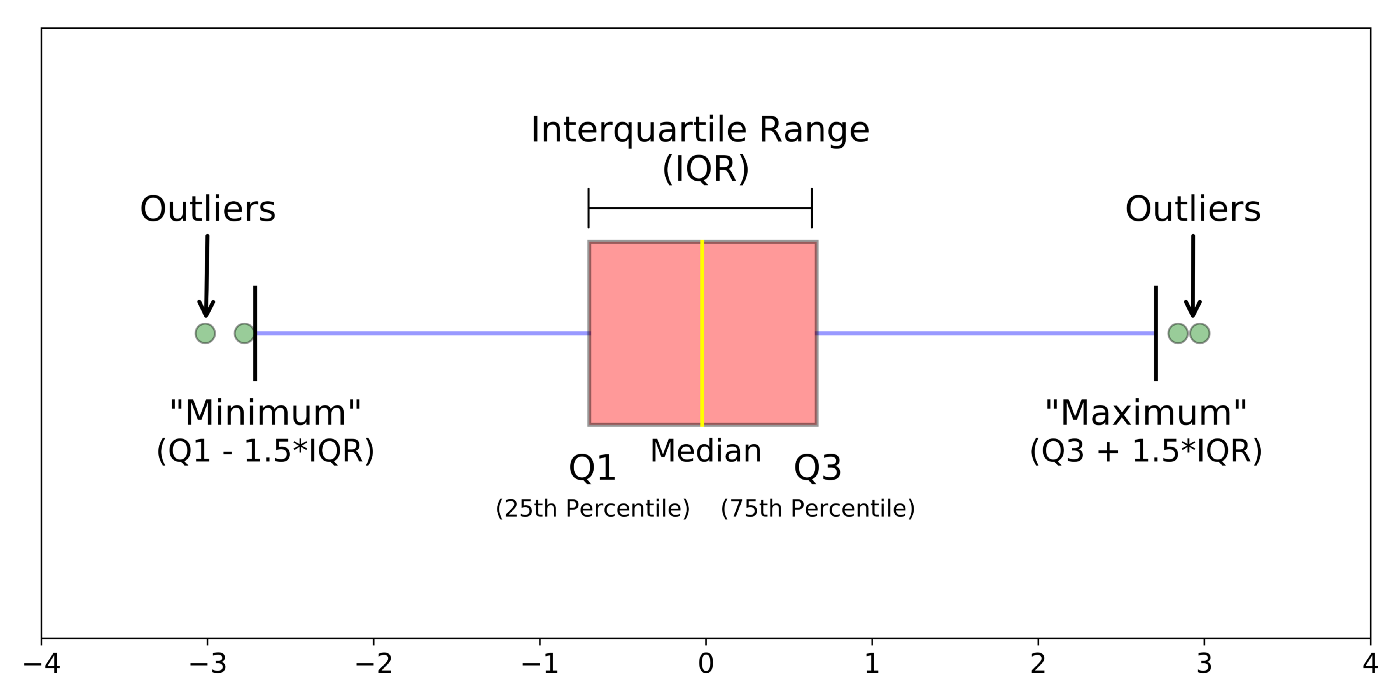

In [148]:
from PIL import Image

img = Image.open("outliers.png")
img.show()

In [149]:
# instanciando um objeto da classe TrataOutlier
dataset = TrataOutlier(new_df)

In [150]:
# Lista de colunas do tipo float64
column_list = new_df.select_dtypes("float64").columns.tolist()

In [151]:
column_list

['Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)',
 'Total UL (Bytes)',
 'Total DL (Bytes)']

In [152]:
dataset.getOverview(column_list)

Nome de Coluna,DL TP > 1 Mbps (%),10 Kbps < UL TP < 50 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,TCP DL Retrans. Vol (Bytes),UL TP < 10 Kbps (%),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),Avg RTT UL (ms),Avg RTT DL (ms),50 Kbps < DL TP < 250 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Total UL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total DL (Bytes)
Min,0.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2866892.0,105.0,42.0,226.0,2516.0,59.0,3290.0,148.0,7114041.0
Q1,0.0,0.0,0.0,85.0,103.0,21280.0,99.0,2811.0,91.0,2.0,31.0,0.0,0.0,0.0,33195877.25,5514710.75,5779228.5,5472993.0,210545770.75,4133533.25,209257243.5,4150420.5,243173582.0
Median,0.0,0.0,0.0,201.0,216.0,335624.0,100.0,15265.0,100.0,5.0,44.0,0.0,0.0,0.0,41131432.5,11016841.0,11676822.0,11000394.5,424090426.0,8306545.0,421468512.5,8265702.0,456473657.0
Q3,0.0,0.0,1.0,2261.0,2211.0,2809779.0,100.0,63942.0,100.0,12.0,67.0,4.0,0.0,0.0,49037824.25,16498665.25,17474658.0,16496305.75,633765547.25,12437878.0,630797587.5,12382440.0,666561385.0
Max,94.0,98.0,76.0,484103.0,480120.0,4294425570.0,100.0,2908226006.0,100.0,7120.0,96923.0,93.0,85.0,96.0,78331311.0,22011962.0,23258861.0,22011955.0,843441889.0,16558794.0,843442489.0,16558769.0,902969616.0
IQR,0.0,0.0,1.0,2176.0,2108.0,2788499.0,1.0,61131.0,9.0,10.0,36.0,4.0,0.0,0.0,15841947.0,10983954.5,11695429.5,11023312.75,423219776.5,8304344.75,421540344.0,8232019.5,423387803.0
Lower fence,0.0,0.0,-1.5,-3179.0,-3059.0,-4161468.5,97.5,-88885.5,77.5,-13.0,-23.0,-6.0,0.0,0.0,9432956.75,-10961221.0,-11763915.75,-11061976.125,-424283894.0,-8322983.875,-423053272.5,-8197608.75,-391908122.5
Upper fence,0.0,0.0,2.5,5525.0,5373.0,6992527.5,101.5,155638.5,113.5,27.0,121.0,10.0,0.0,0.0,72800744.75,32974597.0,35017802.25,33031274.875,1268595212.0,24894395.125,1263108103.5,24730469.25,1301643089.5
Skew,5.475602,11.155016,4.521988,8.453764,7.136419,16.613323,-9.071009,107.930878,-2.29916,29.912857,66.182582,3.266871,22.148557,36.853335,-0.002724,-0.000825,-0.005809,-0.000349,-0.006971,-0.004796,0.002952,0.002063,-0.00682
Num_Outliers,29071,25293,23302,19611,19564,17598,17425,15990,14306,13492,13048,12143,3516,1876,186,0,0,0,0,0,0,0,0


In [153]:
dataset.replace_outliers_with_fences(column_list)

In [154]:
dataset.getOverview(column_list)

Nome de Coluna,Avg RTT DL (ms),Nb of sec with Vol DL < 6250B,Total UL (Bytes),Other UL (Bytes),Other DL (Bytes),Gaming UL (Bytes),Gaming DL (Bytes),Netflix UL (Bytes),Netflix DL (Bytes),Youtube UL (Bytes),Nb of sec with Vol UL < 1250B,UL TP > 300 Kbps (%),Avg RTT UL (ms),50 Kbps < UL TP < 300 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),UL TP < 10 Kbps (%),DL TP > 1 Mbps (%),250 Kbps < DL TP < 1 Mbps (%),50 Kbps < DL TP < 250 Kbps (%),DL TP < 50 Kbps (%),TCP UL Retrans. Vol (Bytes),TCP DL Retrans. Vol (Bytes),Total DL (Bytes)
Min,0.0,1.0,9432956.75,148.0,3290.0,59.0,2516.0,226.0,42.0,105.0,1.0,0.0,0.0,0.0,0.0,97.5,0.0,0.0,0.0,77.5,1.0,2.0,7114041.0
Q1,31.0,85.0,33195877.25,4150420.5,209257243.5,4133533.25,210545770.75,5472993.0,5779228.5,5514710.75,103.0,0.0,2.0,0.0,0.0,99.0,0.0,0.0,0.0,91.0,2811.0,21280.0,243173582.0
Median,44.0,201.0,41131432.5,8265702.0,421468512.5,8306545.0,424090426.0,11000394.5,11676822.0,11016841.0,216.0,0.0,5.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0,15265.0,335624.0,456473657.0
Q3,67.0,2261.0,49037824.25,12382440.0,630797587.5,12437878.0,633765547.25,16496305.75,17474658.0,16498665.25,2211.0,0.0,12.0,0.0,0.0,100.0,0.0,1.0,4.0,100.0,63942.0,2809779.0,666561385.0
Max,121.0,5525.0,72800744.75,16558769.0,843442489.0,16558794.0,843441889.0,22011955.0,23258861.0,22011962.0,5373.0,0.0,27.0,0.0,0.0,100.0,0.0,2.5,10.0,100.0,155638.5,6992527.5,902969616.0
IQR,36.0,2176.0,15841947.0,8232019.5,421540344.0,8304344.75,423219776.5,11023312.75,11695429.5,10983954.5,2108.0,0.0,10.0,0.0,0.0,1.0,0.0,1.0,4.0,9.0,61131.0,2788499.0,423387803.0
Lower fence,-23.0,-3179.0,9432956.75,-8197608.75,-423053272.5,-8322983.875,-424283894.0,-11061976.125,-11763915.75,-10961221.0,-3059.0,0.0,-13.0,0.0,0.0,97.5,0.0,-1.5,-6.0,77.5,-88885.5,-4161468.5,-391908122.5
Upper fence,121.0,5525.0,72800744.75,24730469.25,1263108103.5,24894395.125,1268595212.0,33031274.875,35017802.25,32974597.0,5373.0,0.0,27.0,0.0,0.0,101.5,0.0,2.5,10.0,113.5,155638.5,6992527.5,1301643089.5
Skew,1.078277,1.20339,-0.002393,0.002063,0.002952,-0.004796,-0.006971,-0.000349,-0.005809,-0.000825,1.210844,0.0,1.142703,0.0,0.0,-0.934304,0.0,1.092247,1.296472,-1.221611,1.209012,1.203928,-0.00682
Num_Outliers,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [155]:
new_df.columns.tolist()

['Bearer Id',
 'Start',
 'Start Offset (ms)',
 'End',
 'End Offset (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur (ms)',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (

In [156]:
new_df["Social Media Data Volume(Bytes)"] = new_df["Social Media DL (Bytes)"] + new_df['Social Media UL (Bytes)']
new_df["Google Data Volume(Bytes)"] = new_df["Google DL (Bytes)"] + new_df['Google UL (Bytes)']
new_df["Email Data Volume(Bytes)"] = new_df["Email DL (Bytes)"] + new_df['Email UL (Bytes)']
new_df["Social Data Volume(Bytes)"] = new_df["Youtube DL (Bytes)"] + new_df['Youtube UL (Bytes)']
new_df["Social Data Volume(Bytes)"] = new_df["Netflix DL (Bytes)"] + new_df['Netflix UL (Bytes)']
new_df["Gaming Data Volume(Bytes)"] = new_df["Gaming DL (Bytes)"] + new_df['Gaming UL (Bytes)']
new_df["Other Data Volume(Bytes)"] = new_df["Other DL (Bytes)"] + new_df['Other UL (Bytes)']
new_df["Total Data Volume(Bytes)"] = new_df["Total DL (Bytes)"] + new_df['Total UL (Bytes)']

new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116956 entries, 0 to 119659
Data columns (total 53 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Bearer Id                        116956 non-null  int64         
 1   Start                            116956 non-null  datetime64[ns]
 2   Start Offset (ms)                116956 non-null  int64         
 3   End                              116956 non-null  datetime64[ns]
 4   End Offset (ms)                  116956 non-null  int64         
 5   IMSI                             116956 non-null  int64         
 6   MSISDN/Number                    116956 non-null  int64         
 7   IMEI                             116956 non-null  int64         
 8   Last Location Name               116956 non-null  string        
 9   Avg RTT DL (ms)                  116956 non-null  float64       
 10  Avg RTT UL (ms)                  116956 non-

In [157]:
new_df.shape

(116956, 53)

<h1><b>Salvando o DataFrame</b></h1>

In [158]:
new_df.to_csv("df_clean.csv", index=False)

<h1><b>Fim</b></h1>